In [143]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import time

# Phase 1: Exploratory Data Visualization

In [144]:
data = pd.read_csv("./data.csv")
data.head(10)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN
5,843786,M,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,...,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440,NaN
6,844359,M,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,...,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.1932,0.3063,0.08368,NaN
7,84458202,M,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,...,28.14,110.60,897.0,0.1654,0.3682,0.2678,0.1556,0.3196,0.11510,NaN
8,844981,M,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,...,30.73,106.20,739.3,0.1703,0.5401,0.5390,0.2060,0.4378,0.10720,NaN
9,84501001,M,12.46,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,...,40.68,97.65,711.4,0.1853,1.0580,1.1050,0.2210,0.4366,0.20750,NaN


In [145]:
data_columns = list(data.columns)

### Drop unnecessary columns and segregate targets and features

In [146]:
target = data["diagnosis"]
features = data.drop(["id", "diagnosis", "Unnamed: 32"], axis=1)

In [147]:
features.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


Benign cases: 357, Malignant cases: 212


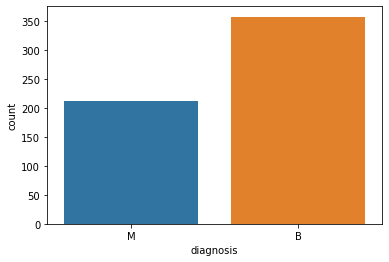

In [148]:
ax = sns.countplot(target, label="Count")
Benign, Malignant = target.value_counts()
print(f"Benign cases: {Benign}, Malignant cases: {Malignant}")

In [149]:
features.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [150]:
features.corr()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
radius_mean,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,-0.311631,...,0.969539,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066
texture_mean,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,-0.076437,...,0.352573,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205
perimeter_mean,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,-0.261477,...,0.969476,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019
area_mean,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,-0.283110,...,0.962746,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738
smoothness_mean,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,0.584792,...,0.213120,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316
compactness_mean,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,0.565369,...,0.535315,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382
concavity_mean,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,0.336783,...,0.688236,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930
concave points_mean,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,0.166917,...,0.830318,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661
symmetry_mean,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,0.479921,...,0.185728,0.090651,0.219169,0.177193,0.426675,0.473200,0.433721,0.430297,0.699826,0.438413
fractal_dimension_mean,-0.311631,-0.076437,-0.261477,-0.283110,0.584792,0.565369,0.336783,0.166917,0.479921,1.000000,...,-0.253691,-0.051269,-0.205151,-0.231854,0.504942,0.458798,0.346234,0.175325,0.334019,0.767297


### Preprocessing

#### Standardizing the data

In [151]:
from sklearn.preprocessing import MinMaxScaler

In [152]:
standardized_features = MinMaxScaler().fit_transform(features.values)

In [153]:
standardized_features = pd.DataFrame(standardized_features, columns=features.columns)
standardized_features.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,0.521037,0.022658,0.545989,0.363733,0.593753,0.792037,0.703140,0.731113,0.686364,0.605518,...,0.620776,0.141525,0.668310,0.450698,0.601136,0.619292,0.568610,0.912027,0.598462,0.418864
1,0.643144,0.272574,0.615783,0.501591,0.289880,0.181768,0.203608,0.348757,0.379798,0.141323,...,0.606901,0.303571,0.539818,0.435214,0.347553,0.154563,0.192971,0.639175,0.233590,0.222878
2,0.601496,0.390260,0.595743,0.449417,0.514309,0.431017,0.462512,0.635686,0.509596,0.211247,...,0.556386,0.360075,0.508442,0.374508,0.483590,0.385375,0.359744,0.835052,0.403706,0.213433
3,0.210090,0.360839,0.233501,0.102906,0.811321,0.811361,0.565604,0.522863,0.776263,1.000000,...,0.248310,0.385928,0.241347,0.094008,0.915472,0.814012,0.548642,0.884880,1.000000,0.773711
4,0.629893,0.156578,0.630986,0.489290,0.430351,0.347893,0.463918,0.518390,0.378283,0.186816,...,0.519744,0.123934,0.506948,0.341575,0.437364,0.172415,0.319489,0.558419,0.157500,0.142595


### Visualization

#### Violin plots
Violin plots are a great way to get an overview of the distribution of a feature corresponding to the target. If the number of rows in the dataset are too many, violin plots make sense

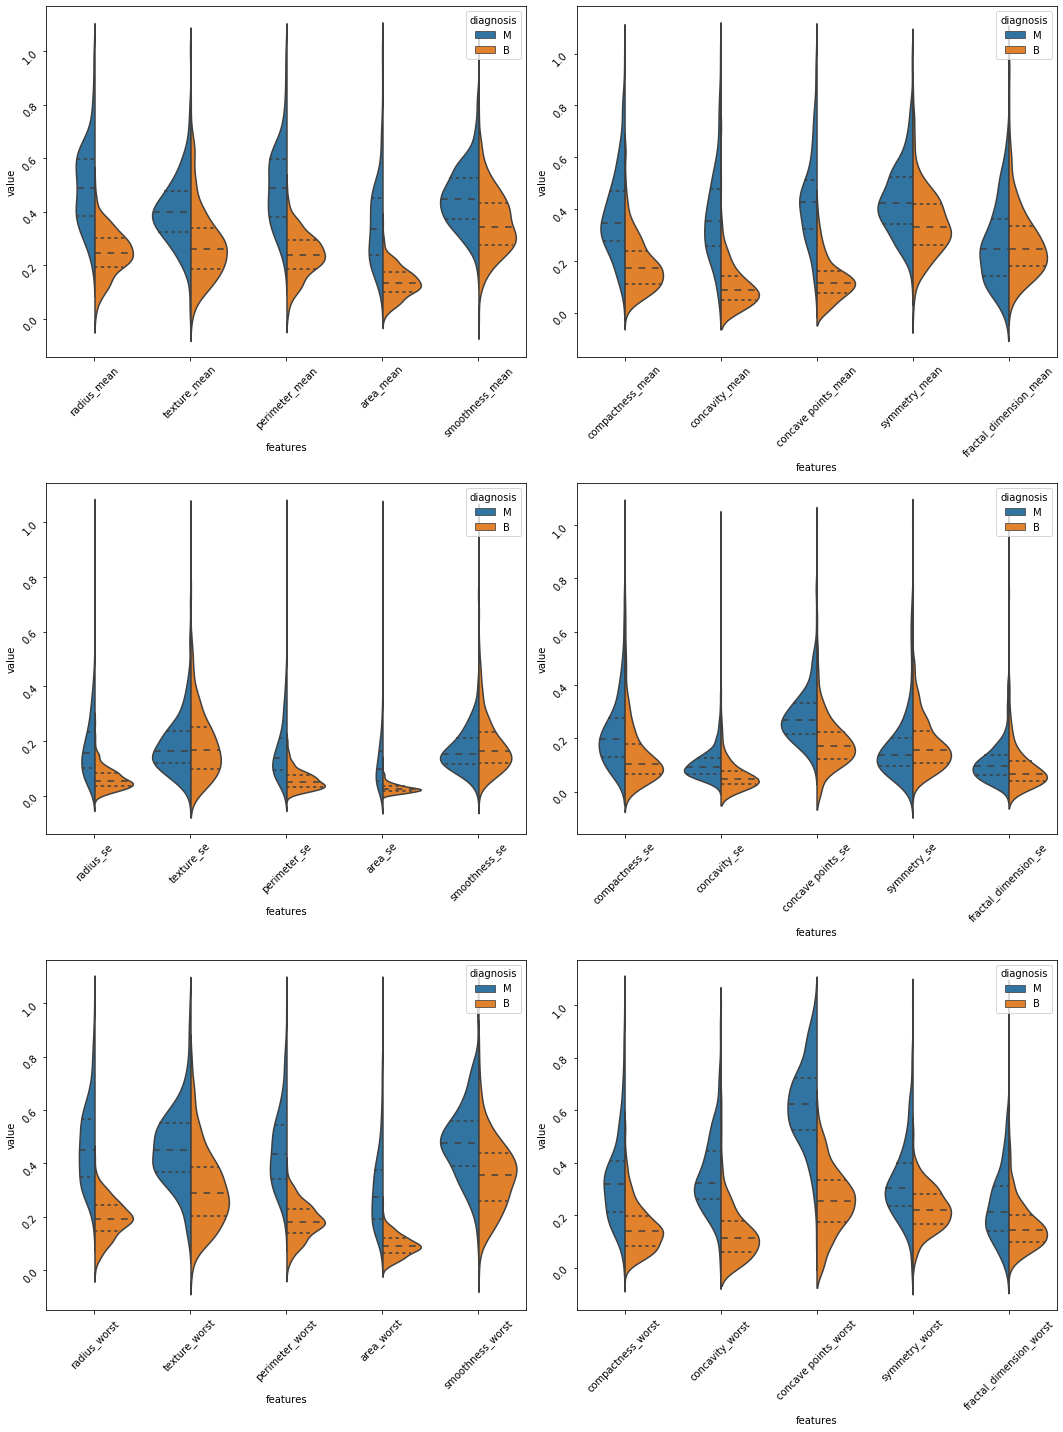

In [154]:
fig, axs = plt.subplots(3, 2, figsize=(15, 20))
plt.xticks(rotation=45)

step = 5
for i, ax in zip(range(0, standardized_features.shape[-1], step), axs.flat):
    # create a temp dataframe consisting of each five features
    temp_data = pd.concat([target, standardized_features.iloc[:, i:i + step]], axis=1)
    # convert the data from wide format to long format
    temp_data = pd.melt(temp_data, id_vars="diagnosis", var_name="features")
    # violin plot of the data
    plot = sns.violinplot(x="features", y="value", hue="diagnosis", 
                   data=temp_data, split=True, inner="quart", ax=ax)
    ax.tick_params(labelrotation=45)

plt.tight_layout()

#### Boxplots
If the distribution is not of particular interest, and we merely want to see the outliers and the quartiles of the feature with respect to the target, boxplots can be used

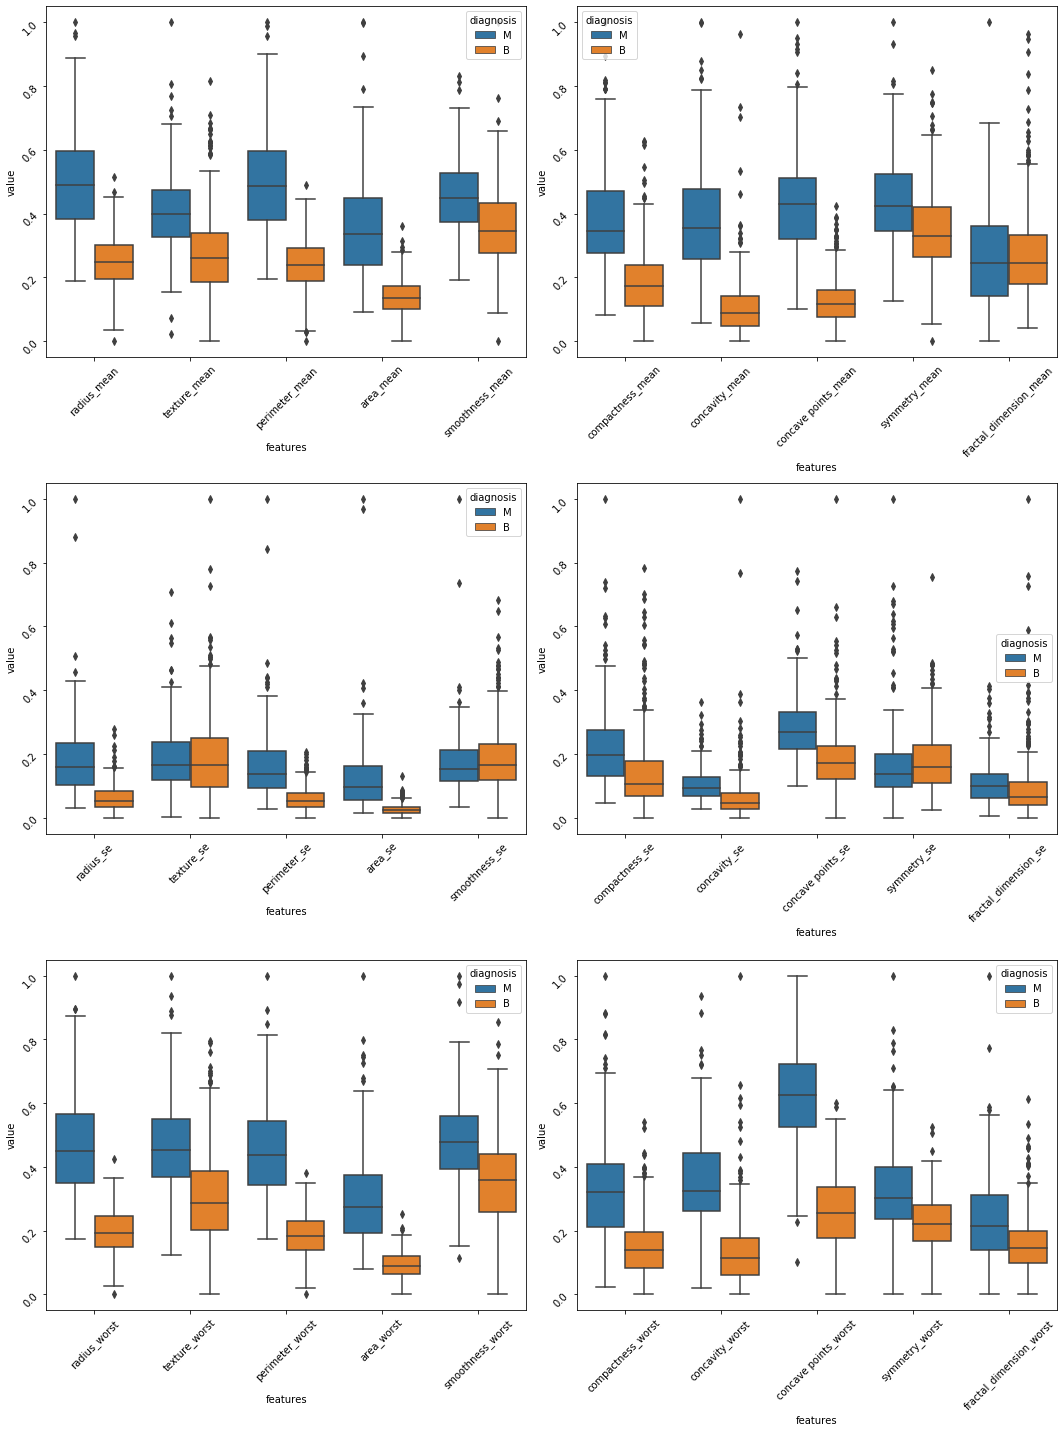

In [155]:
fig, axs = plt.subplots(3, 2, figsize=(15, 20))
plt.xticks(rotation=45)

step = 5
for i, ax in zip(range(0, standardized_features.shape[-1], step), axs.flat):
    # create a temp dataframe consisting of each five features
    temp_data = pd.concat([target, standardized_features.iloc[:, i:i + step]], axis=1)
    # convert the data from wide format to long format
    temp_data = pd.melt(temp_data, id_vars="diagnosis", var_name="features")
    # violin plot of the data
    plot = sns.boxplot(x="features", y="value", hue="diagnosis", 
                   data=temp_data, ax=ax)
    ax.tick_params(labelrotation=45)

plt.tight_layout()

#### Swarm plots
If the number of data points is relatively low (5k-10k-ish), it might make sense to plot a swarm plot. However, they are costly and take a lot of time to be generated.

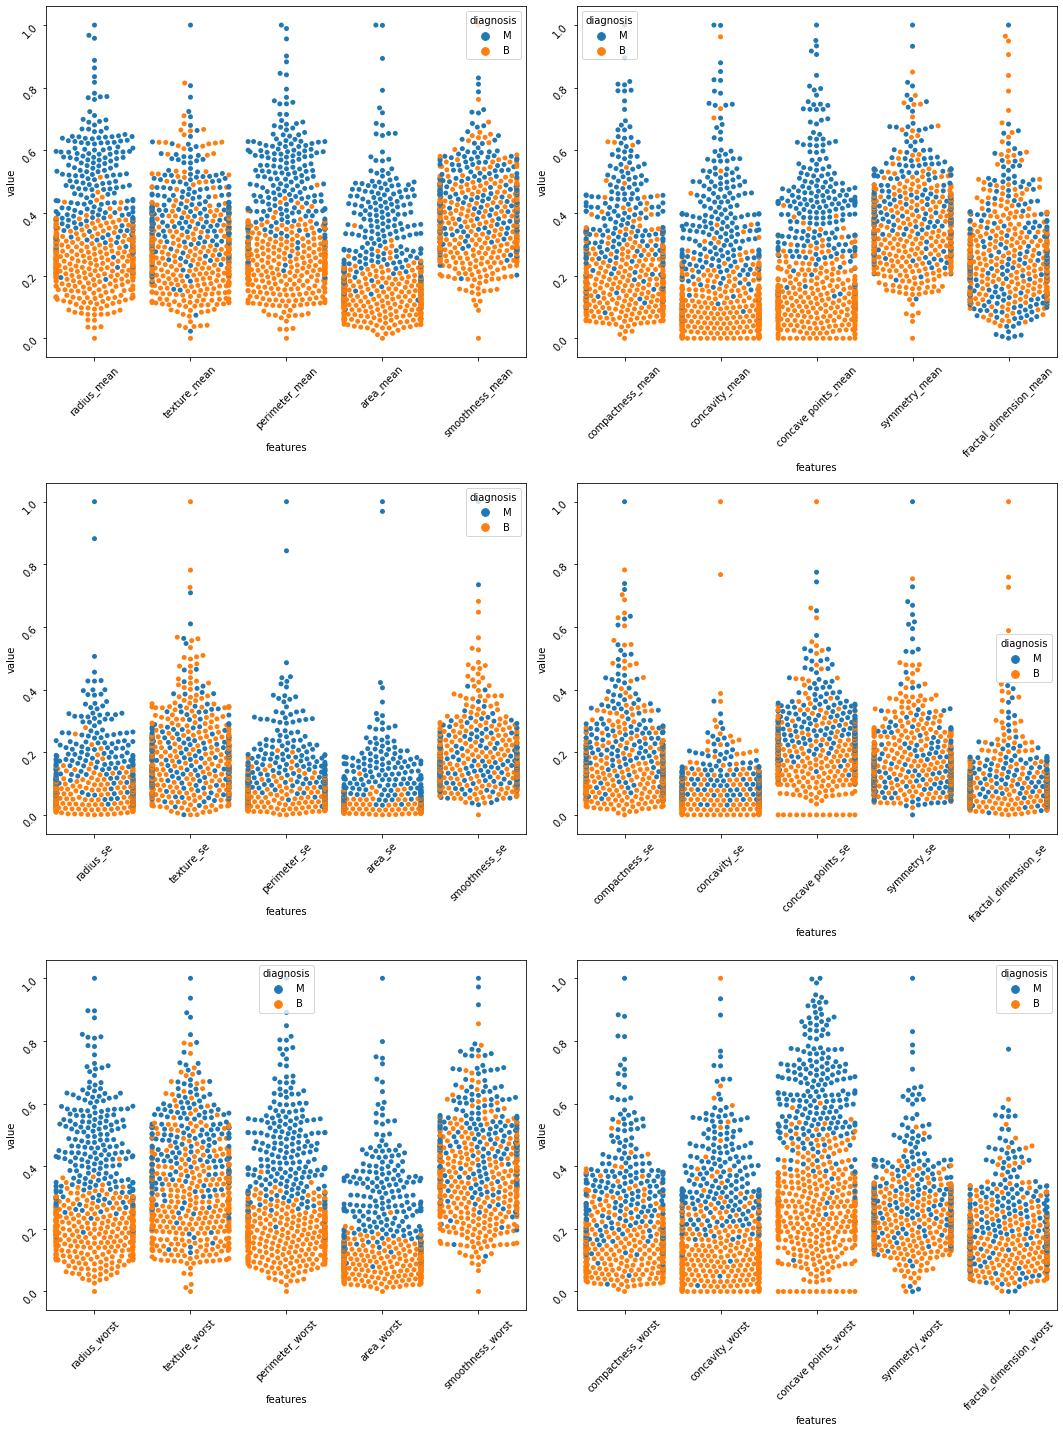

In [156]:
fig, axs = plt.subplots(3, 2, figsize=(15, 20))
plt.xticks(rotation=45)

step = 5
for i, ax in zip(range(0, standardized_features.shape[-1], step), axs.flat):
    # create a temp dataframe consisting of each five features
    temp_data = pd.concat([target, standardized_features.iloc[:, i:i + step]], axis=1)
    # convert the data from wide format to long format
    temp_data = pd.melt(temp_data, id_vars="diagnosis", var_name="features")
    # violin plot of the data
    plot = sns.swarmplot(x="features", y="value", hue="diagnosis", 
                   data=temp_data, ax=ax)
    ax.tick_params(labelrotation=45)

plt.tight_layout()

#### Heatmaps
Heatmaps are a great way to visualize the correlation of data

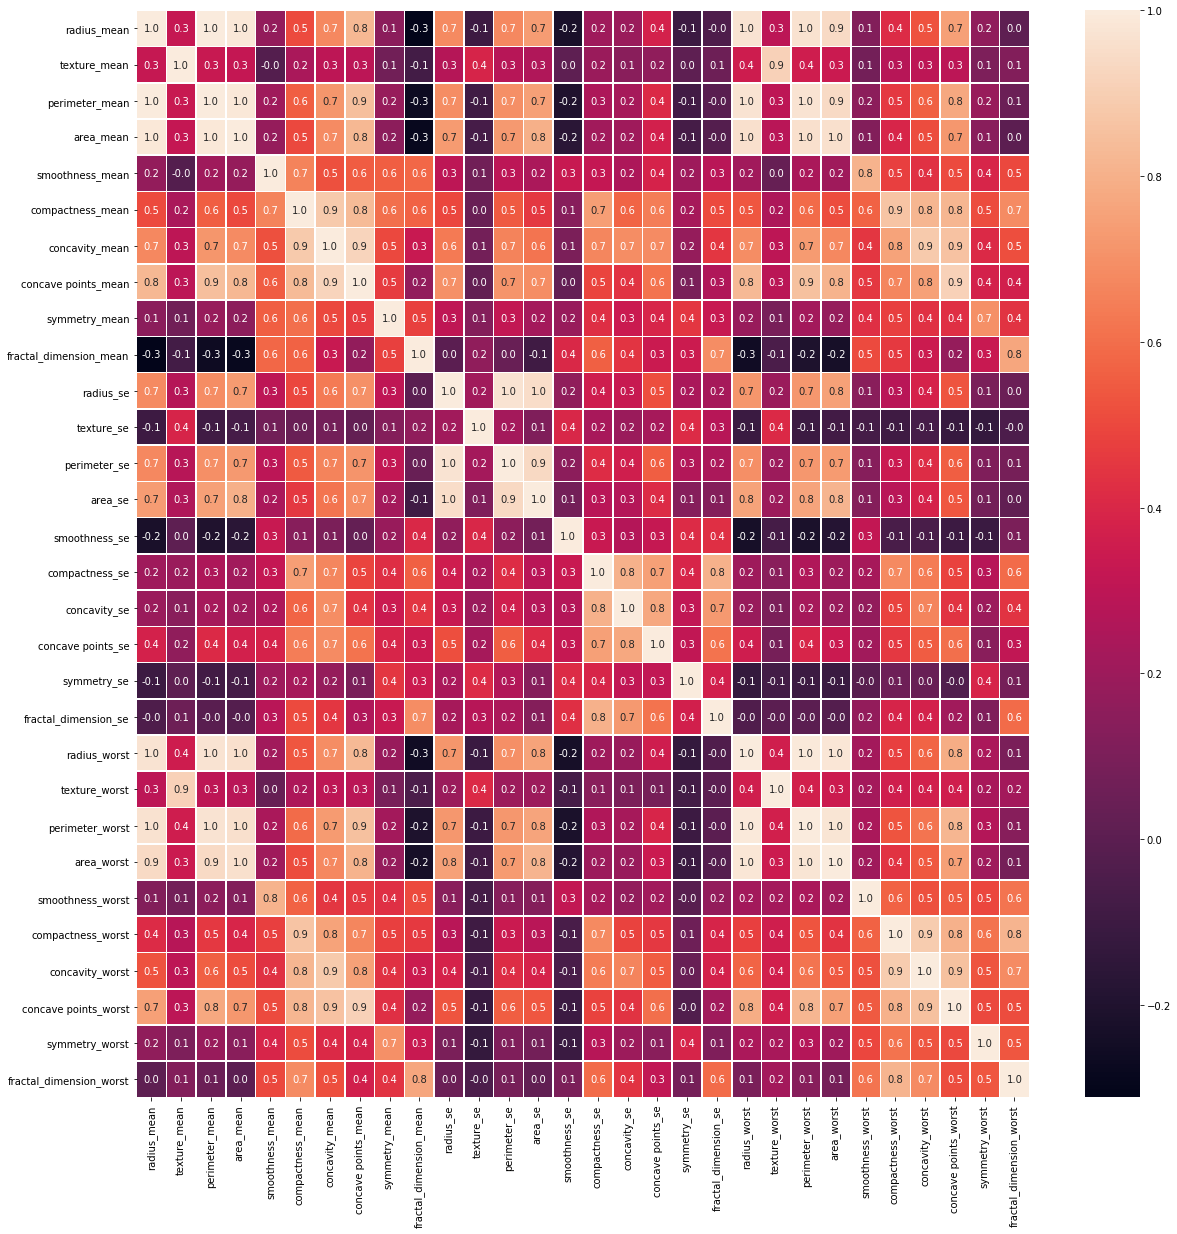

In [157]:
fig, ax = plt.subplots(figsize=(20, 20))
sns.heatmap(
    standardized_features.corr(), 
    annot=True, 
    linewidth=0.6,
    fmt=".1f",
    ax=ax
)

#### Joint plots
Joint plots are a great way to take a deeper look at two specific features of interest

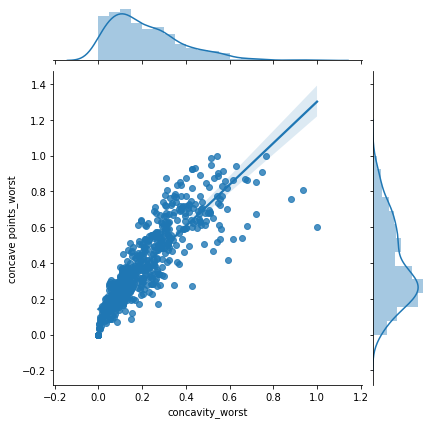

In [158]:
sns.jointplot(
    standardized_features.loc[:, "concavity_worst"],
    standardized_features.loc[:, "concave points_worst"],
    kind="regg"
);

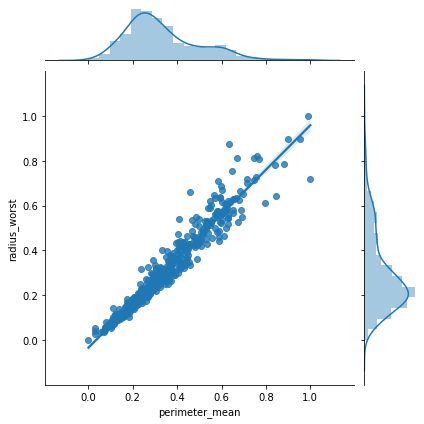

In [159]:
sns.jointplot(
    standardized_features.loc[:, "perimeter_mean"],
    standardized_features.loc[:, "radius_worst"],
    kind="regg"
);

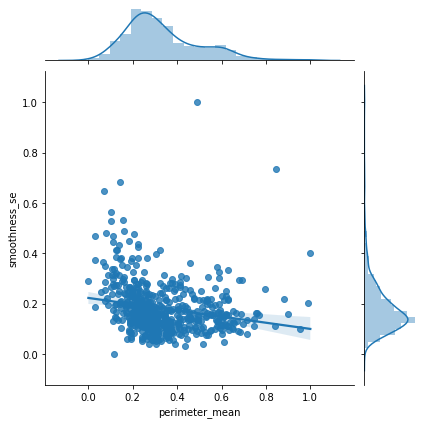

In [160]:
sns.jointplot(
    standardized_features.loc[:, "perimeter_mean"],
    standardized_features.loc[:, "smoothness_se"],
    kind="regg"
);

# Phase 2: Statistical Inference and Classification

In [161]:
drop_cols = [
    "perimeter_mean", "radius_mean", "compactness_mean",
    "concave points_mean", "radius_se", "perimeter_se",
    "radius_worst", "perimeter_worst", "compactness_worst",
    "concave points_worst", "compactness_se", "concave points_se",
    "texture_worst", "area_worst"
]

In [162]:
df = standardized_features.drop(drop_cols, axis=1)

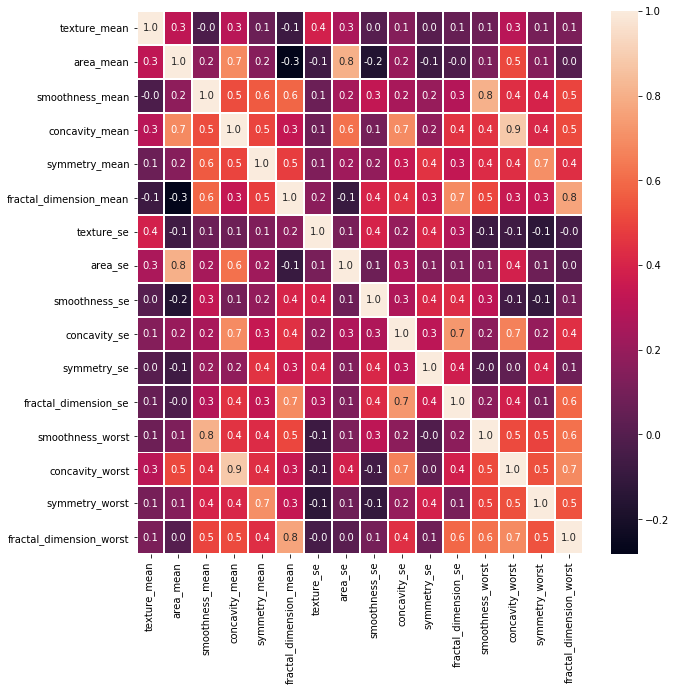

In [163]:
fig, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(
    df.corr(),
    annot=True,
    fmt=".1f",
    linewidth=1,
    ax=ax
);

In [135]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, confusion_matrix, accuracy_score

In [164]:
X = df
Y = target

In [172]:
x_train, x_test, y_train, y_test = train_test_split(X, Y,
                                                   test_size=0.3,
                                                   shuffle=True)

Accuracy: 0.96%
F1 Score: 0.97


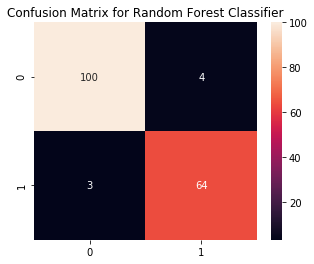

In [179]:
random_forest_classifier = RandomForestClassifier()
random_forest_classifier = random_forest_classifier.fit(x_train, y_train)

y_predict = random_forest_classifier.predict(x_test)

cm = confusion_matrix(y_test, y_predict)

fig, ax = plt.subplots(figsize=(5, 4))
ax.set_title("Confusion Matrix for Random Forest Classifier")
sns.heatmap(cm, annot=True, fmt="d", ax=ax);

print(f"Accuracy: {accuracy_score(y_test, y_predict):.2f}%")
f1 = f1_score(y_test, y_predict, pos_label="B")
print(f"F1 Score: {f1:.2f}")

Accuracy: 0.95%
F1 Score: 0.96


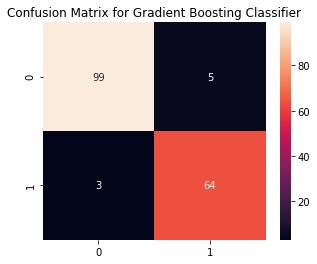

In [180]:
gradient_boosting_classifier = GradientBoostingClassifier()
gradient_boosting_classifier = gradient_boosting_classifier.fit(x_train, y_train)

y_predict = gradient_boosting_classifier.predict(x_test)

cm = confusion_matrix(y_test, y_predict)

fig, ax = plt.subplots(figsize=(5, 4))
ax.set_title("Confusion Matrix for Gradient Boosting Classifier")
sns.heatmap(cm, annot=True, fmt="d", ax=ax);

print(f"Accuracy: {accuracy_score(y_test, y_predict):.2f}%")
f1 = f1_score(y_test, y_predict, pos_label="B")
print(f"F1 Score: {f1:.2f}")

In [181]:
from sklearn.feature_selection import SelectKBest, chi2

In [182]:
select_feature = SelectKBest(chi2, k=10).fit(x_train, y_train)

print("Score list: ", select_feature.scores_)
print("Feature list: ", x_train.columns)

Score list:  [3.57410701e+00 2.19415666e+01 2.01913011e+00 3.22117372e+01
 2.12995124e+00 5.05327780e-02 1.58543246e-02 1.46049873e+01
 3.16107779e-01 1.54789992e+00 5.44670403e-03 3.51980698e-02
 3.55170726e+00 2.22292412e+01 4.03553658e+00 2.79690567e+00]
Feature list:  Index(['texture_mean', 'area_mean', 'smoothness_mean', 'concavity_mean',
       'symmetry_mean', 'fractal_dimension_mean', 'texture_se', 'area_se',
       'smoothness_se', 'concavity_se', 'symmetry_se', 'fractal_dimension_se',
       'smoothness_worst', 'concavity_worst', 'symmetry_worst',
       'fractal_dimension_worst'],
      dtype='object')


In [183]:
x_train_2 = select_feature.transform(x_train)
x_test_2 = select_feature.transform(x_test)

Accuracy: 0.96%
F1 Score: 0.97


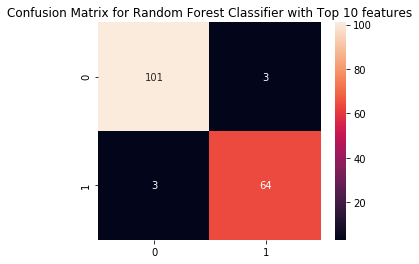

In [185]:
random_forest_classifier = RandomForestClassifier()
random_forest_classifier = random_forest_classifier.fit(x_train_2, y_train)

y_predict = random_forest_classifier.predict(x_test_2)

cm = confusion_matrix(y_test, y_predict)

fig, ax = plt.subplots(figsize=(5, 4))
ax.set_title("Confusion Matrix for Random Forest Classifier with Top 10 features")
sns.heatmap(cm, annot=True, fmt="d", ax=ax);

print(f"Accuracy: {accuracy_score(y_test, y_predict):.2f}%")
f1 = f1_score(y_test, y_predict, pos_label="B")
print(f"F1 Score: {f1:.2f}")

In [186]:
from sklearn.feature_selection import RFECV

In [188]:
random_forest_classifier = RandomForestClassifier()
rfecv = RFECV(estimator=random_forest_classifier, 
              step=1, cv=5, scoring="accuracy", n_jobs=-1)\
              .fit(x_train, y_train)

print(f"Optimal number of features = {rfecv.n_features_}")
print(f"Best features: ", x_train.columns[rfecv.support_])

Optimal number of features = 11
Best features:  Index(['texture_mean', 'area_mean', 'smoothness_mean', 'concavity_mean',
       'fractal_dimension_mean', 'area_se', 'concavity_se', 'smoothness_worst',
       'concavity_worst', 'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')


Accuracy: 0.96%
F1 Score: 0.97


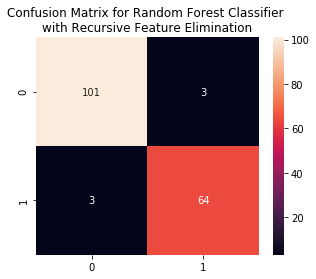

In [193]:
y_predict = rfecv.predict(x_test)

cm = confusion_matrix(y_test, y_predict)

fig, ax = plt.subplots(figsize=(5, 4))
ax.set_title("Confusion Matrix for Random Forest Classifier \nwith Recursive Feature Elimination")
sns.heatmap(cm, annot=True, fmt="d", ax=ax);

print(f"Accuracy: {accuracy_score(y_test, y_predict):.2f}%")
f1 = f1_score(y_test, y_predict, pos_label="B")
print(f"F1 Score: {f1:.2f}")

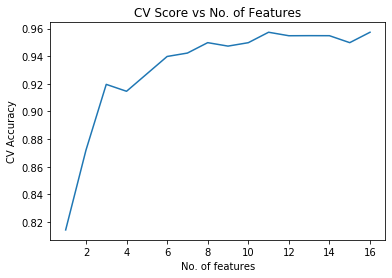

In [204]:
num_features = [i for i in range(1, len(rfecv.grid_scores_) + 1)]
cv_scores = rfecv.grid_scores_

ax = sns.lineplot(x=num_features, y=cv_scores);
ax.set(xlabel="No. of features", ylabel="CV Accuracy", title="CV Score vs No. of Features");

In [205]:
from sklearn.decomposition import PCA

In [217]:
pca = PCA()
pca.fit_transform(standardized_features);

Text(0.5, 1.0, 'Cumulative explained variance vs No. of features')

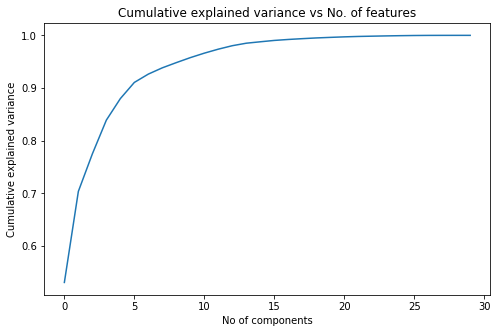

In [218]:
plt.figure(1, figsize=(8, 5))
sns.lineplot(data=np.cumsum(pca.explained_variance_ratio_));
plt.xlabel("No of components");
plt.ylabel("Cumulative explained variance");
plt.title("Cumulative explained variance vs No. of features")